# Data Loading:

In [41]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.width',None)

In [42]:
hh_demographic = pd.read_csv("hh_demographic.csv")
transaction_data = pd.read_csv("transaction_data.csv")

In [43]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB


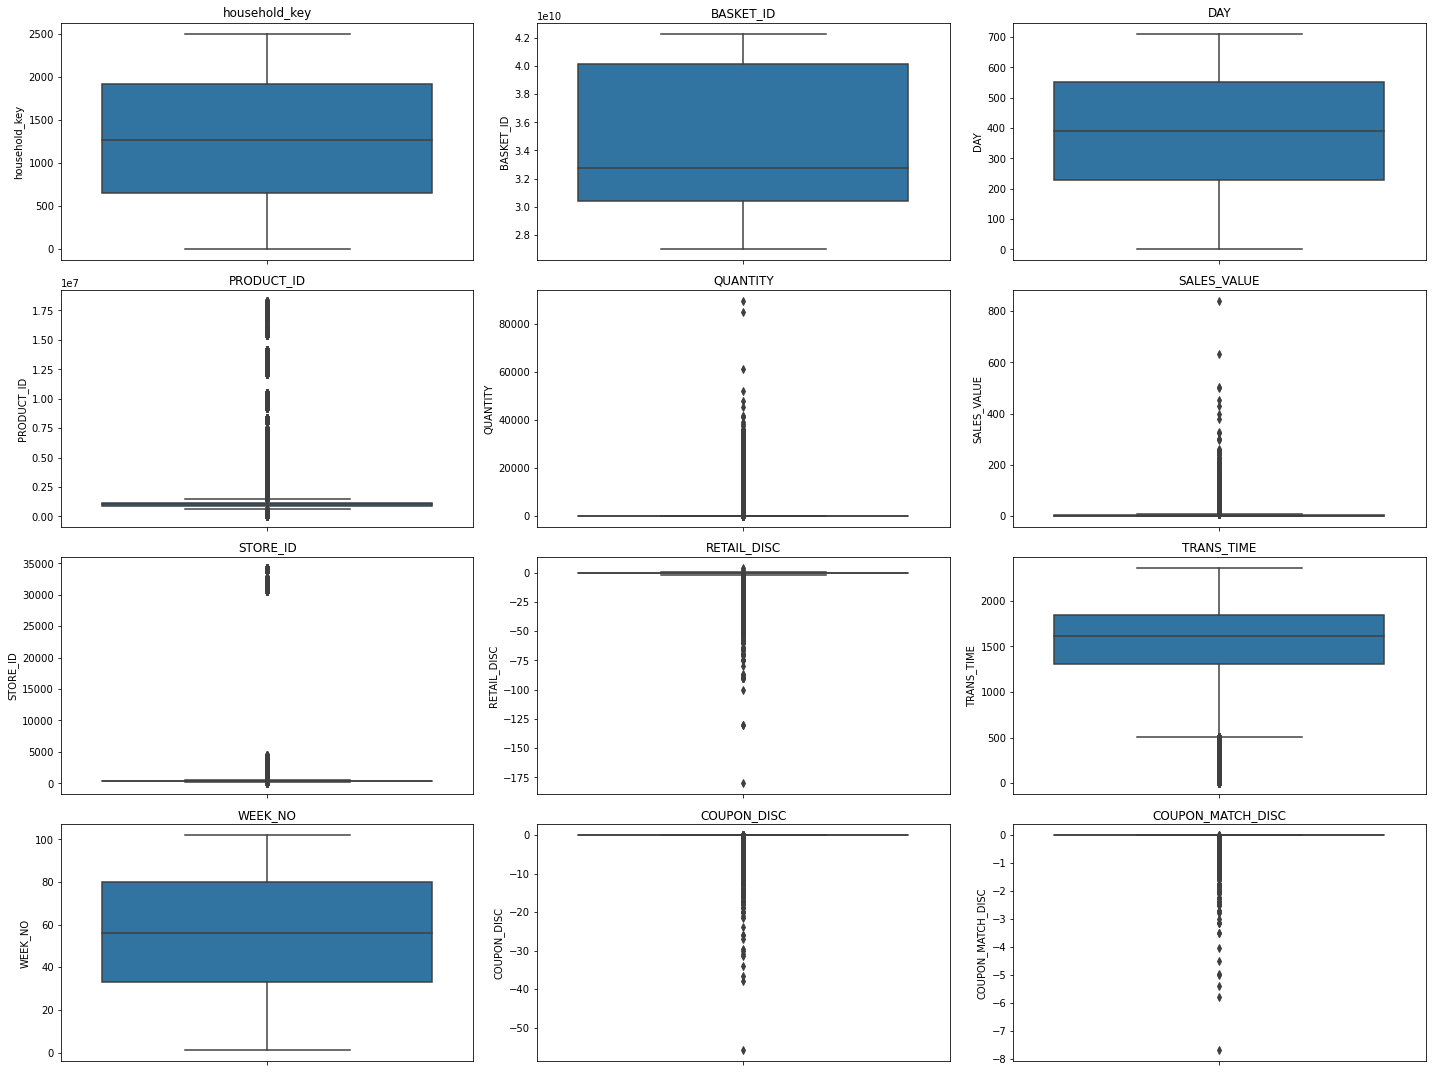

In [44]:
# Set the figure size
plt.figure(figsize=(20, 15))

# Create boxplots for each column
for i, column in enumerate(transaction_data.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=transaction_data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

# Imputing the outliers:

In [45]:
def impute_outliers(df):
    # Loop through each column in the dataframe
    for column in df.columns:
        # Calculate the Q1 and Q3 quantiles
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Impute the outliers
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

# Apply the function to your dataframe
transaction_data = impute_outliers(transaction_data)

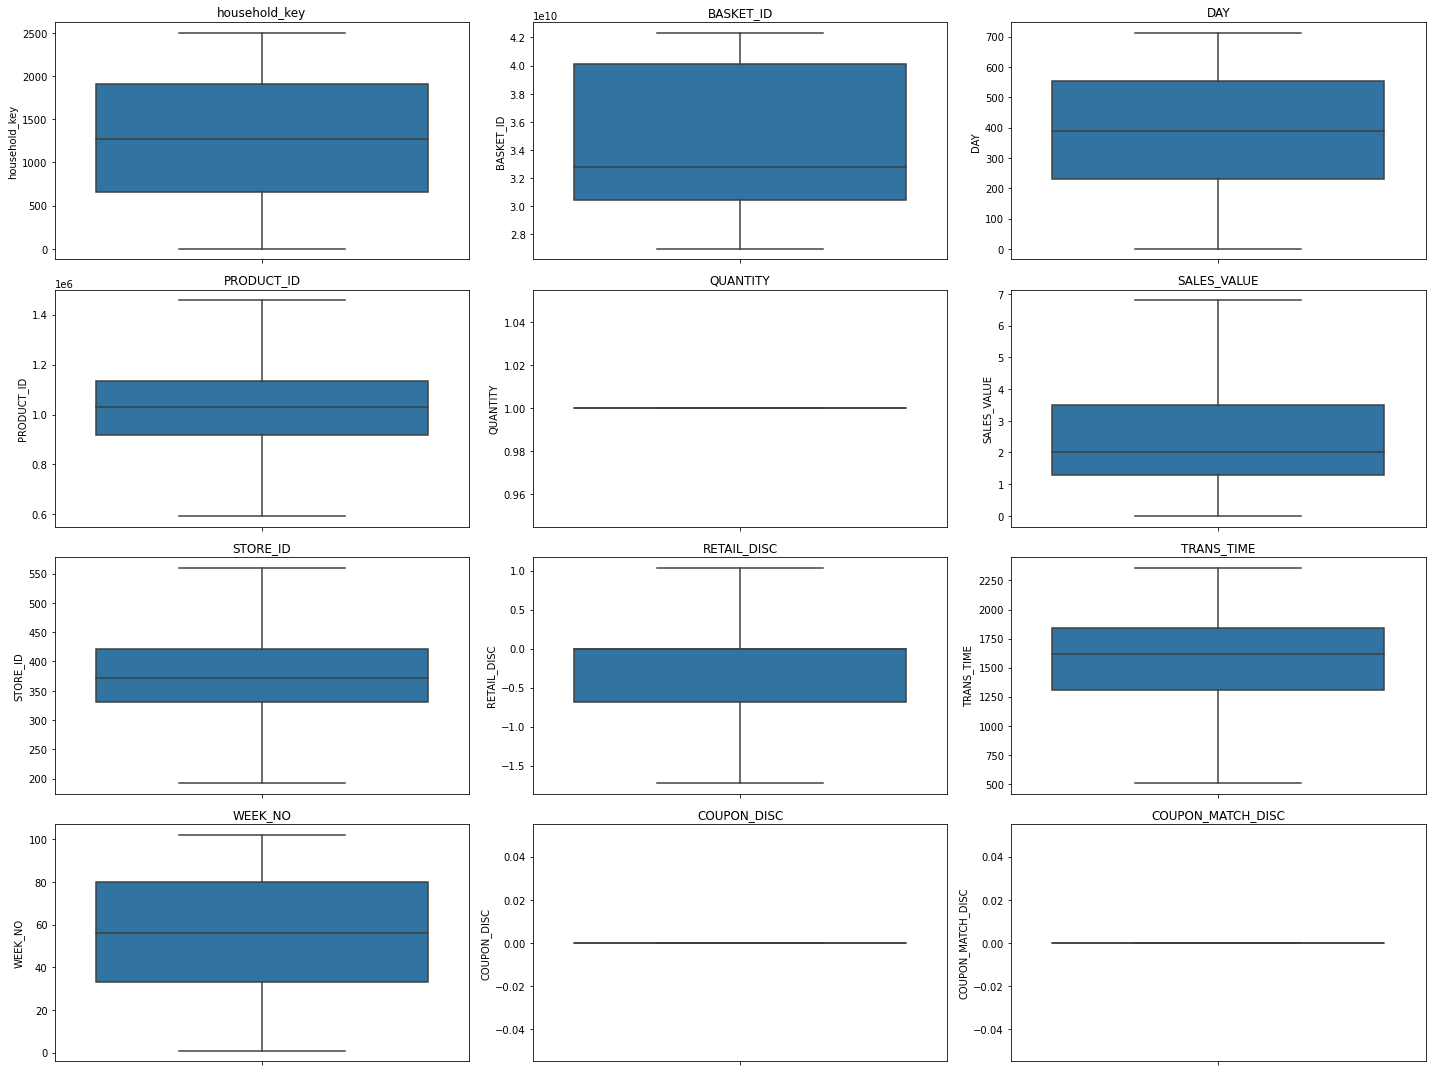

In [46]:
# Set the figure size
plt.figure(figsize=(20, 15))

# Create boxplots for each column
for i, column in enumerate(transaction_data.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=transaction_data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [47]:
hh_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HOMEOWNER_DESC       801 non-null    object
 4   HH_COMP_DESC         801 non-null    object
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object
 6   KID_CATEGORY_DESC    801 non-null    object
 7   household_key        801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


# Encode categorical variable:

In [48]:
#the categorical values in each feature are converted to numerical values.
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df):
    # Create a LabelEncoder object
    label_encoder = LabelEncoder()

    # Loop through each column in the DataFrame
    for column in df.columns:
        if df[column].dtype == 'object':  # Check if the column is categorical
            df[column] = label_encoder.fit_transform(df[column])

    return df

# Apply the function to your DataFrame
encoded_df = encode_categorical_columns(hh_demographic)

In [49]:
hh_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   AGE_DESC             801 non-null    int32
 1   MARITAL_STATUS_CODE  801 non-null    int32
 2   INCOME_DESC          801 non-null    int32
 3   HOMEOWNER_DESC       801 non-null    int32
 4   HH_COMP_DESC         801 non-null    int32
 5   HOUSEHOLD_SIZE_DESC  801 non-null    int32
 6   KID_CATEGORY_DESC    801 non-null    int32
 7   household_key        801 non-null    int64
dtypes: int32(7), int64(1)
memory usage: 28.3 KB


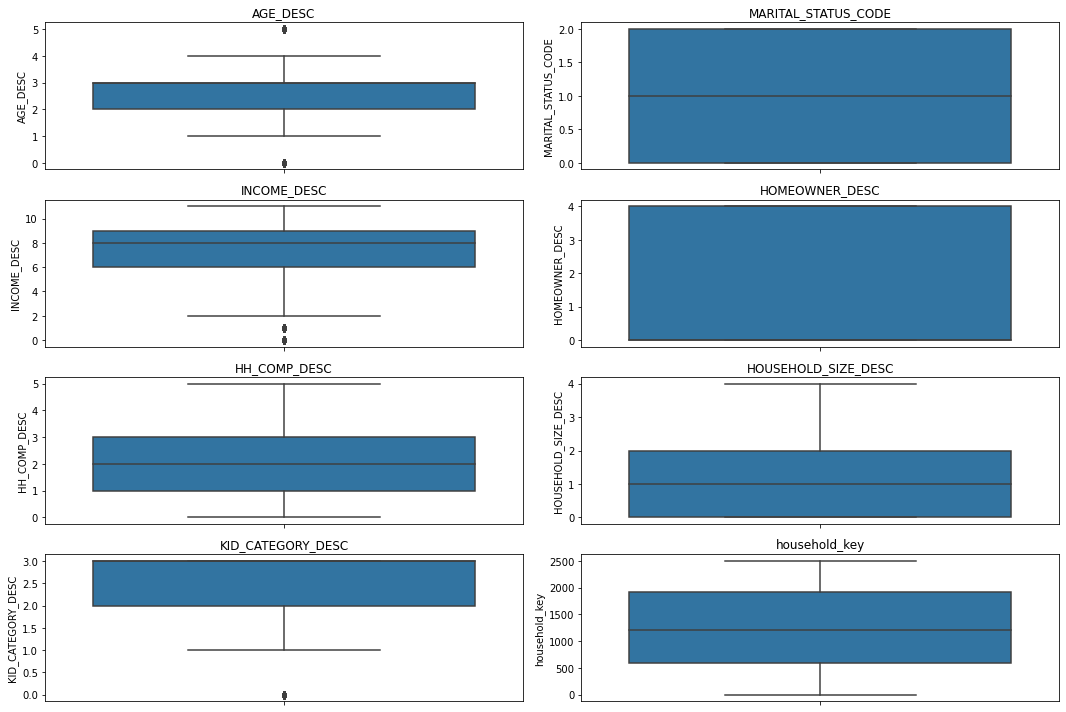

In [50]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Loop through each column in the DataFrame
for i, column in enumerate(hh_demographic.columns, 1):
    plt.subplot(4, 2, i)  # Adjust the grid size based on the number of plots
    sns.boxplot(y=hh_demographic[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [51]:
hh_demographic = impute_outliers(hh_demographic)

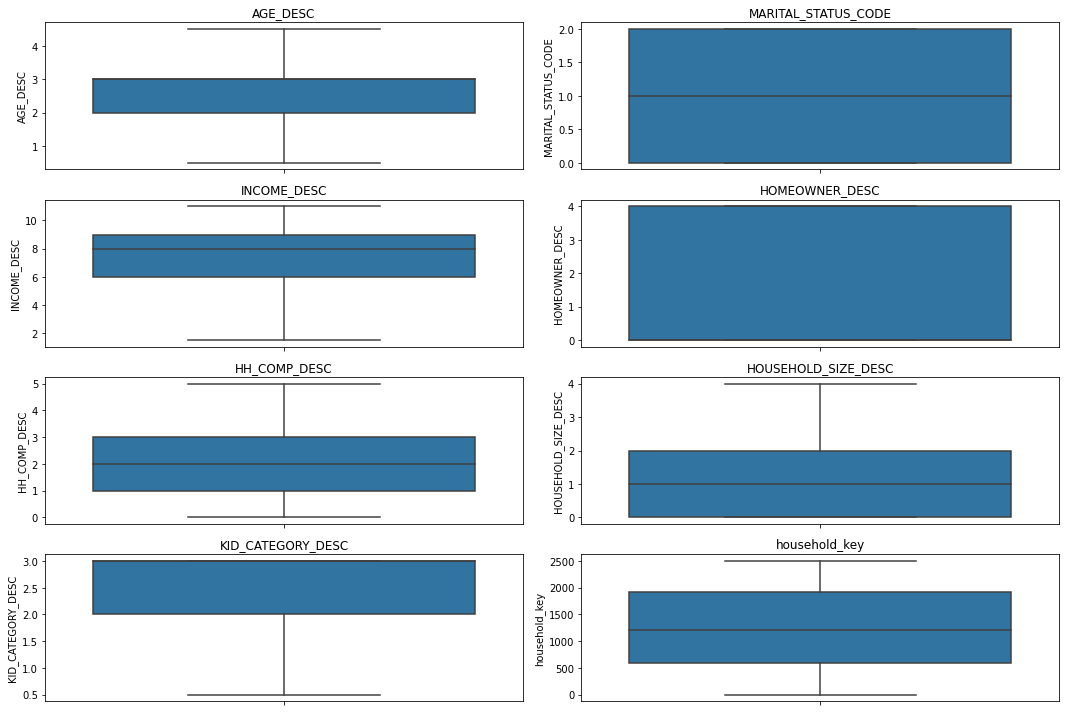

In [52]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Loop through each column in the DataFrame
for i, column in enumerate(hh_demographic.columns, 1):
    plt.subplot(4, 2, i)  # Adjust the grid size based on the number of plots
    sns.boxplot(y=hh_demographic[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [53]:
merged_data = pd.merge(transaction_data, hh_demographic, on='household_key')

In [54]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1427303 entries, 0 to 1427302
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   household_key        1427303 non-null  float64
 1   BASKET_ID            1427303 non-null  float64
 2   DAY                  1427303 non-null  float64
 3   PRODUCT_ID           1427303 non-null  float64
 4   QUANTITY             1427303 non-null  float64
 5   SALES_VALUE          1427303 non-null  float64
 6   STORE_ID             1427303 non-null  float64
 7   RETAIL_DISC          1427303 non-null  float64
 8   TRANS_TIME           1427303 non-null  float64
 9   WEEK_NO              1427303 non-null  float64
 10  COUPON_DISC          1427303 non-null  float64
 11  COUPON_MATCH_DISC    1427303 non-null  float64
 12  AGE_DESC             1427303 non-null  float64
 13  MARITAL_STATUS_CODE  1427303 non-null  float64
 14  INCOME_DESC          1427303 non-null  float64
 15

In [55]:
merged_data.isnull().sum()

household_key          0
BASKET_ID              0
DAY                    0
PRODUCT_ID             0
QUANTITY               0
SALES_VALUE            0
STORE_ID               0
RETAIL_DISC            0
TRANS_TIME             0
WEEK_NO                0
COUPON_DISC            0
COUPON_MATCH_DISC      0
AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
dtype: int64

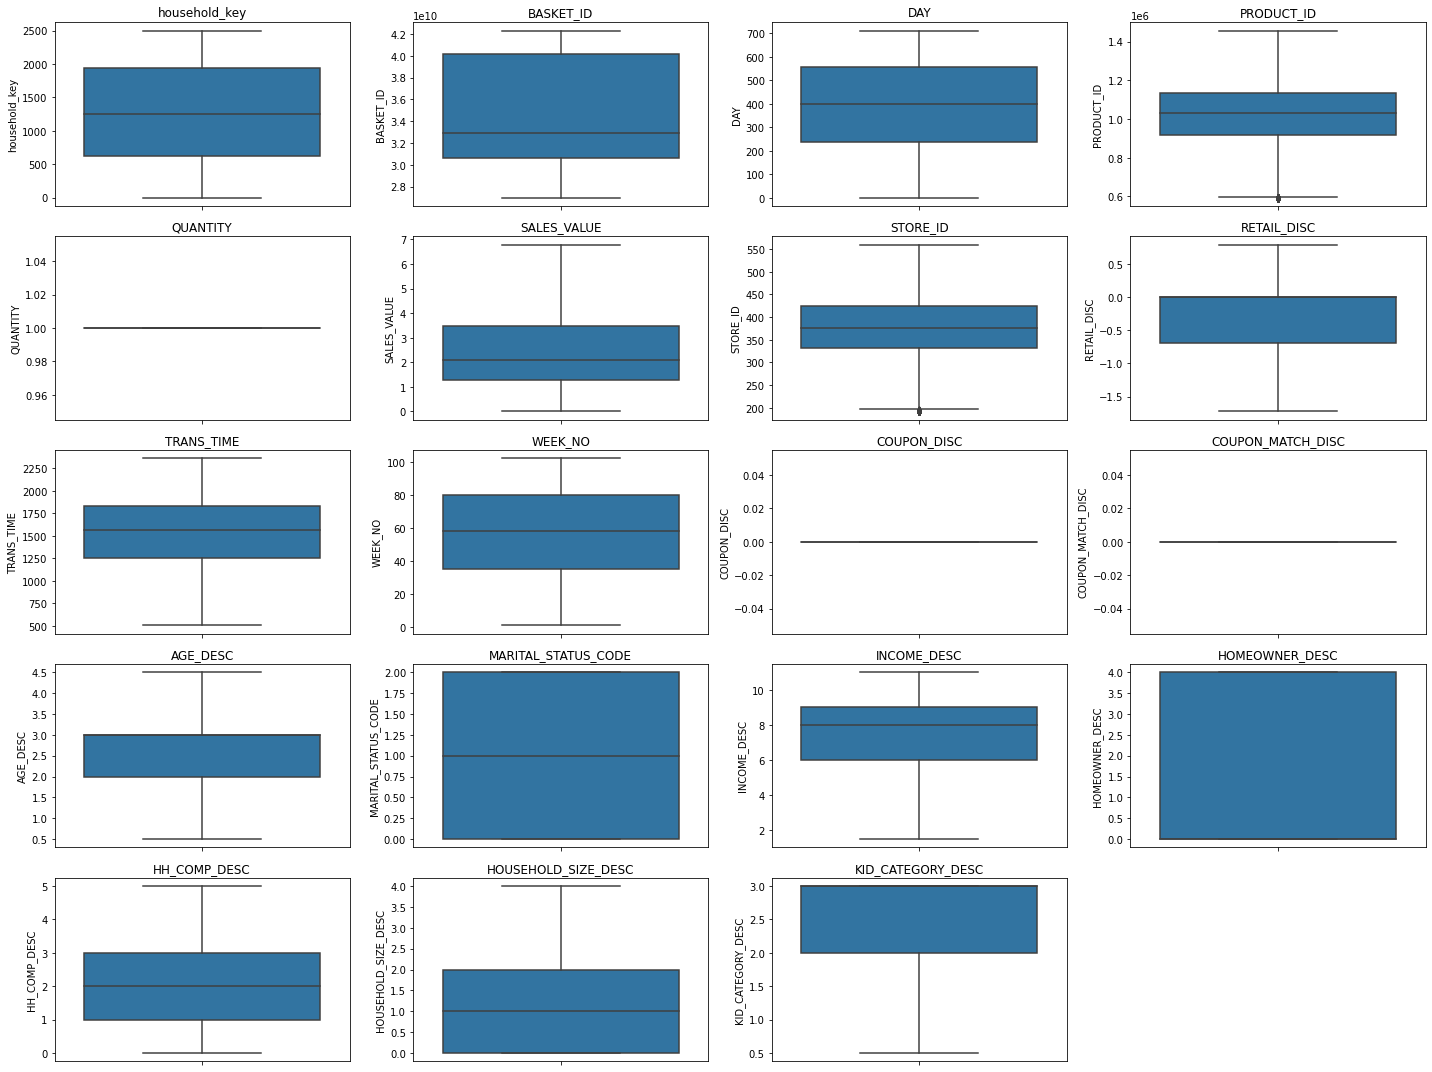

In [56]:
# Set the figure size
plt.figure(figsize=(20, 15))

# Loop through each column in the DataFrame
for i, column in enumerate(merged_data.columns, 1):
    plt.subplot(5, 4, i)  # Adjust the grid size based on the number of columns
    sns.boxplot(y=merged_data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

# Feature Engineering:

In [57]:
features = merged_data.groupby('household_key').agg({
    'SALES_VALUE': 'sum',
    'QUANTITY': 'sum',
    'COUPON_DISC': 'sum',
    'COUPON_MATCH_DISC': 'sum',
    'DAY': 'mean',
    'TRANS_TIME': 'mean',
    # Add more features as needed
}).reset_index()

features = pd.merge(features, hh_demographic, on='household_key')

In [59]:
# the column has a mean of 0 and a standard deviation of 1.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.drop('household_key', axis=1))


In [62]:
n_clusters = 4  # Replace with the optimal number of clusters from the elbow method
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
features['Cluster'] = kmeans.fit_predict(scaled_features)

# Elbow Method to Determine Optimal Number of Clusters for K-Means Clustering:

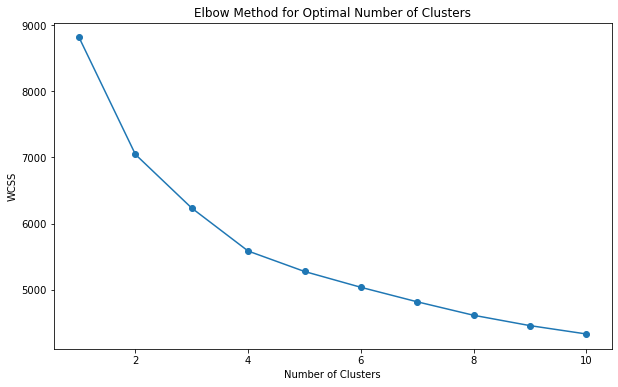

In [61]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [63]:
for col in features.columns:
    if col != 'Cluster':
        print(f"\nAnalysis of {col} by Cluster:")
        cluster_analysis = features.groupby('Cluster')[col].mean()
        print(cluster_analysis)


Analysis of household_key by Cluster:
Cluster
0    1259.181818
1    1237.943463
2    1396.739583
3    1120.837696
Name: household_key, dtype: float64

Analysis of SALES_VALUE by Cluster:
Cluster
0     3767.072381
1     3929.897208
2    10994.706979
3     4005.169162
Name: SALES_VALUE, dtype: float64

Analysis of QUANTITY by Cluster:
Cluster
0    1395.242424
1    1517.901060
2    3964.635417
3    1543.617801
Name: QUANTITY, dtype: float64

Analysis of COUPON_DISC by Cluster:
Cluster
0    0.0
1    0.0
2    0.0
3    0.0
Name: COUPON_DISC, dtype: float64

Analysis of COUPON_MATCH_DISC by Cluster:
Cluster
0    0.0
1    0.0
2    0.0
3    0.0
Name: COUPON_MATCH_DISC, dtype: float64

Analysis of DAY by Cluster:
Cluster
0    398.241184
1    397.075274
2    386.799405
3    402.224447
Name: DAY, dtype: float64

Analysis of TRANS_TIME by Cluster:
Cluster
0    1516.346705
1    1602.135876
2    1514.523880
3    1568.754108
Name: TRANS_TIME, dtype: float64

Analysis of AGE_DESC by Cluster:
Cluster
0

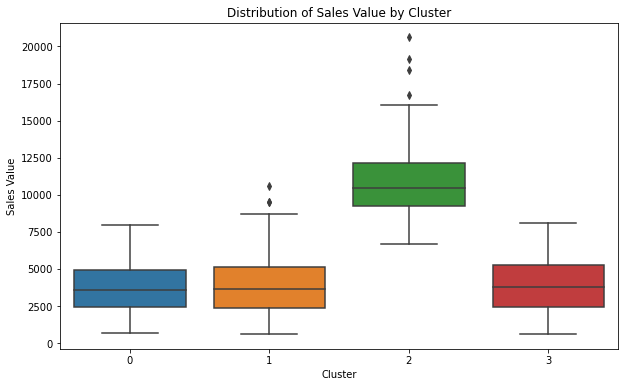

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='SALES_VALUE', data=features)
plt.title('Distribution of Sales Value by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Sales Value')
plt.show()

# 2D PCA Visualization of Clusters:

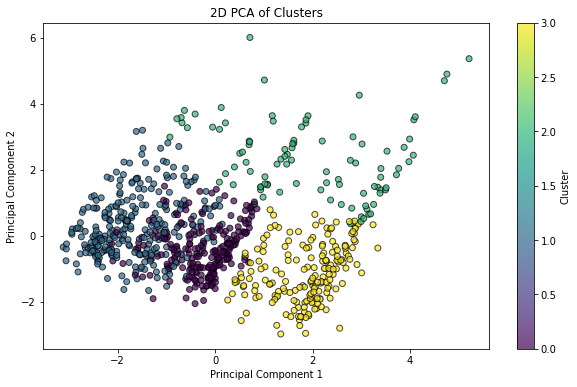

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = features['Cluster']

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.7, edgecolors='k')
plt.colorbar(scatter, label='Cluster')
plt.title('2D PCA of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# 3D PCA Visualization of Clusters

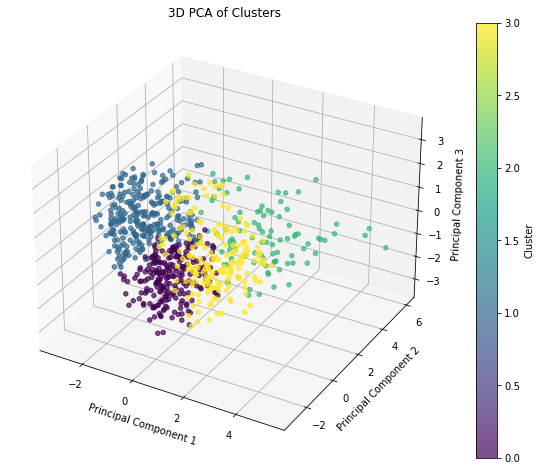

In [68]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = features['Cluster']

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
ax.set_title('3D PCA of Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

# Hierarchical Clustering Dendrogram:

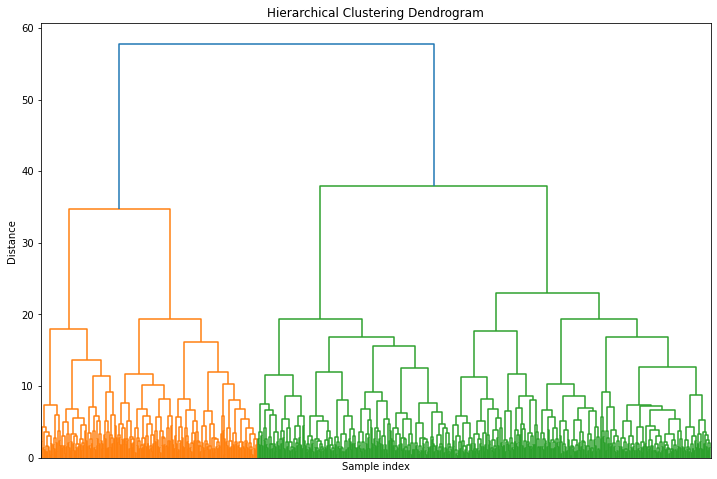

In [71]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [72]:
current_day = transaction_data['DAY'].max()
rfm = transaction_data.groupby('household_key').agg({
    'DAY': lambda x: current_day - x.max(),
    'BASKET_ID': 'nunique',
    'SALES_VALUE': 'sum'
}).reset_index()
rfm.columns = ['household_key', 'Recency', 'Frequency', 'Monetary']

rfm['R_rank'] = pd.qcut(rfm['Recency'], 5, labels=range(5, 0, -1))
rfm['F_rank'] = pd.qcut(rfm['Frequency'], 5, labels=range(1, 6))
rfm['M_rank'] = pd.qcut(rfm['Monetary'], 5, labels=range(1, 6))

rfm['RFM_Score'] = rfm['R_rank'].astype(str) + rfm['F_rank'].astype(str) + rfm['M_rank'].astype(str)

def segment_customers(rfm):
    if rfm == '555':
        return 'Champions'
    elif rfm[0] == '5' or rfm[1] == '5':
        return 'Loyal Customers'
    elif rfm[0] == '4':
        return 'Potential Loyalists'
    elif rfm[2] == '5':
        return 'Big Spenders'
    elif rfm[0] == '1' and rfm[1] == '1':
        return 'Hibernating'
    else:
        return 'Others'

rfm['Segment'] = rfm['RFM_Score'].apply(segment_customers)
print(rfm.head())

   household_key  Recency  Frequency  Monetary R_rank F_rank M_rank RFM_Score  \
0            1.0      5.0         86   4259.30      3      3      4       334   
1            2.0     43.0         45   1849.04      1      2      3       123   
2            3.0      8.0         47   2446.25      3      2      4       324   
3            4.0     84.0         30    962.29      1      1      2       112   
4            5.0      8.0         40    690.64      3      2      2       322   

       Segment  
0       Others  
1       Others  
2       Others  
3  Hibernating  
4       Others  


In [73]:
merged_data = pd.merge(rfm, hh_demographic, on='household_key', how='inner')
print(merged_data.head())

   household_key  Recency  Frequency  Monetary R_rank F_rank M_rank RFM_Score  \
0            1.0      5.0         86   4259.30      3      3      4       334   
1            7.0      2.0         59   3261.64      4      2      4       424   
2            8.0      5.0        113   5009.40      3      4      5       345   
3           13.0      2.0        275   7836.60      4      5      5       455   
4           16.0     21.0         98   1346.58      2      3      2       232   

               Segment  AGE_DESC  MARITAL_STATUS_CODE  INCOME_DESC  \
0               Others       4.5                  0.0          8.0   
1  Potential Loyalists       3.0                  0.0          9.0   
2         Big Spenders       1.0                  2.0          6.0   
3      Loyal Customers       1.0                  2.0         10.0   
4               Others       3.0                  1.0          9.0   

   HOMEOWNER_DESC  HH_COMP_DESC  HOUSEHOLD_SIZE_DESC  KID_CATEGORY_DESC  
0             0.0 

In [75]:
features = merged_data.drop(columns=['household_key', 'RFM_Score', 'Segment'])
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(features)
merged_data['Cluster'] = clusters
print(merged_data[['household_key', 'Cluster']].head())

   household_key  Cluster
0            1.0        3
1            7.0        1
2            8.0        3
3           13.0        0
4           16.0        1


In [76]:
for col in hh_demographic.columns:
    if col != 'household_key':
        print(f"Analysis of {col} by Cluster:")
        cluster_analysis = merged_data.groupby('Cluster')[col].value_counts(normalize=True).unstack().fillna(0)
        print(cluster_analysis)
        print("\n")

cluster_profile = merged_data.groupby('Cluster').mean()
print(cluster_profile)


Analysis of AGE_DESC by Cluster:
AGE_DESC       0.5       1.0       2.0       3.0       4.0       4.5
Cluster                                                             
0         0.014184  0.205674  0.269504  0.382979  0.070922  0.056738
1         0.060423  0.181269  0.202417  0.338369  0.087613  0.129909
2         0.039216  0.117647  0.431373  0.313725  0.039216  0.058824
3         0.079137  0.169065  0.241007  0.381295  0.064748  0.064748


Analysis of MARITAL_STATUS_CODE by Cluster:
MARITAL_STATUS_CODE       0.0       1.0       2.0
Cluster                                          
0                    0.468085  0.120567  0.411348
1                    0.389728  0.151057  0.459215
2                    0.568627  0.098039  0.333333
3                    0.417266  0.161871  0.420863


Analysis of INCOME_DESC by Cluster:
INCOME_DESC      1.5       2.0       3.0       4.0       5.0       6.0   \
Cluster                                                                   
0            0.1063

In [77]:
def marketing_strategy(cluster):
    if cluster == 0:
        return "Targeted Discount"
    elif cluster == 1:
        return "Loyalty Program"
    elif cluster == 2:
        return "New Product Recommendation"
    elif cluster == 3:
        return "Re-engagement Campaign"
    else:
        return "General Offer"

merged_data['Marketing_Strategy'] = merged_data['Cluster'].apply(marketing_strategy)
print(merged_data[['household_key', 'Cluster', 'Marketing_Strategy']].head())


   household_key  Cluster      Marketing_Strategy
0            1.0        3  Re-engagement Campaign
1            7.0        1         Loyalty Program
2            8.0        3  Re-engagement Campaign
3           13.0        0       Targeted Discount
4           16.0        1         Loyalty Program


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [80]:
churn_data['Churn'].value_counts()

0    766
1     35
Name: Churn, dtype: int64

In [83]:
!pip install imbalanced-learn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


# Model Building:

In [85]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint, uniform

# Assuming 'features' DataFrame is already loaded and processed

# Step 1: Create target variable 'Churn'
churn_data = features.copy()
churn_data['Churn'] = (churn_data['Recency'] > 30).astype(int)

# Define features and target
X = churn_data.drop(['Churn'], axis=1)
y = churn_data['Churn']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [86]:
# Step 2: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [87]:
# Step 3: Initial Model Training
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [88]:
# Make predictions
y_pred = rf.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       231
           1       1.00      1.00      1.00        10

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241

Confusion Matrix:
[[231   0]
 [  0  10]]


In [89]:
# Step 4: Cross-Validation
cv_scores = cross_val_score(rf, X_scaled, y, cv=5, scoring='f1')
print(f"Cross-validation F1 scores: {cv_scores}")
print(f"Mean cross-validation F1 score: {cv_scores.mean()}")

Cross-validation F1 scores: [0.92307692 1.         1.         1.         1.        ]
Mean cross-validation F1 score: 0.9846153846153847


In [92]:
# Step 5: Hyperparameter Tuning with RandomizedSearchCV
# Define the parameter distributions for RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=30,  # Adjusted for fewer samples
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=1  # Use only one job to avoid memory issues
)

# Fit RandomizedSearchCV
try:
    random_search.fit(X_train_resampled, y_train_resampled)
except TerminatedWorkerError:
    print("Error during RandomizedSearchCV fitting. Try reducing the number of iterations or parallel jobs.")

# Print best parameters and best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_}")

# Fit the model with the best parameters from random search
best_rf = random_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)

Best parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 260}
Best F1 score: 1.0


In [93]:
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       231
           1       1.00      1.00      1.00        10

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241

Confusion Matrix:
[[231   0]
 [  0  10]]


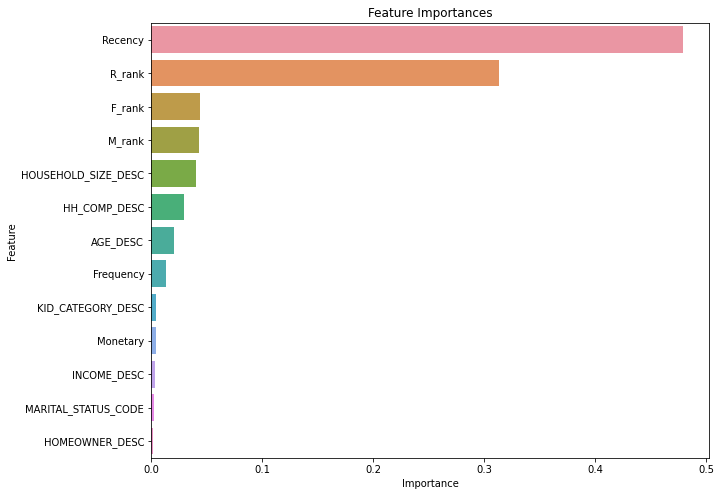

In [94]:
# Feature Importance
importances = best_rf.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()